# Simulated annealing Demo 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys

sys.path.insert(0, "../../src")

In [3]:
from env.light_grid import LightGrid
from walker.light_walker import LightWalker
from walker.simulated_annealing import SimulatedAnnealing

In [4]:
x_l, x_r = -10, 10
y_l, y_r = -10, 10

In [5]:
def global_optimizer(x, y):
    return 1 / 1000 * (10 - x * np.sin(0.01 * x + y) + y ** 2 * np.cos(x) + x * y * np.sin(x + y))

In [6]:
xx = np.linspace(x_l, x_r, 100)
yy = np.linspace(y_l, y_r, 100)

X, Y = np.meshgrid(xx, yy)

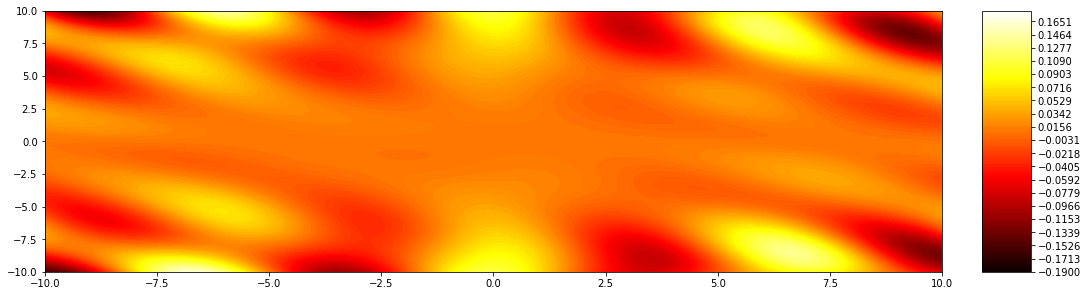

In [7]:
cmap = plt.get_cmap('hot')

levels = np.linspace(-0.19, 0.18, 100)

fig, ax = plt.subplots(constrained_layout = True)

fig.set_figwidth(15)

cs = ax.contourf(X, Y, global_optimizer(X, Y), levels, cmap = cmap)
c_bar = fig.colorbar(cs, ticks = levels[::5])

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

plt.show()

In [8]:
annealing = SimulatedAnnealing(initial_temperature = 1000, temperature_decay = 0.99)

In [9]:
grid = LightGrid(bounded = True, bounds = [(x_l, x_r), (y_l, y_r)], dr = np.ones(2) * 1e-2, dim = 2)
grid.add_processor(global_optimizer, name = "optimizer")

In [10]:
no_of_walkers = 100
no_of_steps = int(1e3)

def get_initial_coordinates(no, x_bounds, y_bounds):
    return np.random.uniform(low = x_bounds[0], high = x_bounds[1], size = no),\
            np.random.uniform(low = y_bounds[0], high = y_bounds[1], size = no)

In [11]:
walkers = []

In [12]:
coordinates = get_initial_coordinates(no_of_walkers, (-10, 10), (-10, 10))

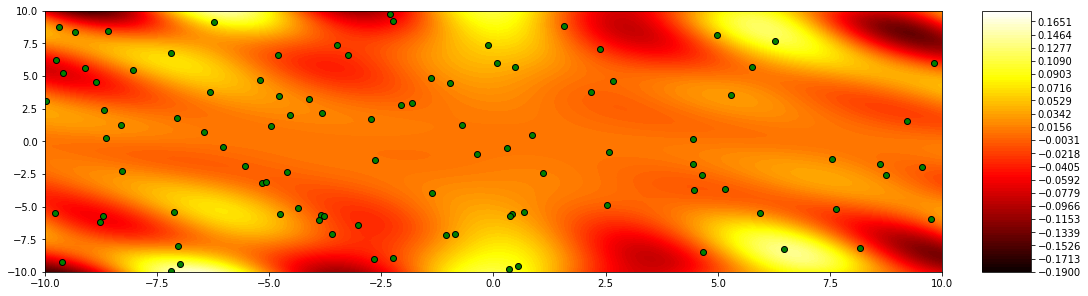

In [13]:
ax.scatter(coordinates[0], coordinates[1], c = 'g', edgecolor = 'k')
fig

In [14]:
for i in range(no_of_walkers):
    wlk = LightWalker(dim = 2, \
                 data_collection_keys = ['optimizer'], \
                 max_no_of_steps = no_of_steps, \
                 initial_position = np.array([coordinates[0][i], coordinates[1][i]]), \
                 next_step_processor = annealing)
    walkers.append(wlk)

In [15]:
drs = [np.ones(2, dtype = np.float64) * 1e-1, \
       np.ones(2, dtype = np.float64) * 1e-2, \
       np.ones(2, dtype = np.float64) * 1e-3, \
       np.ones(2, dtype = np.float64) * 1e-4]

In [16]:
from random import choice

In [17]:
for i in range(no_of_steps):
    next_positions = 0
    for walker in walkers:
        curr = walker.get_current_position()
        data_collector = list(key for key in walker.data.keys())[0]
        dr = choice(drs)
        next_positions = grid._next(curr, dr = dr)
        eng_curr = grid.processors[data_collector](curr[0], curr[1])
        eng_next = np.array([grid.processors[data_collector](next_pos[0], next_pos[1]) for next_pos in next_positions])
        walker.walk(possible_states = next_positions, energies = eng_next, current_energy = eng_curr)
    if i % 50 == 0:
        print(i)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


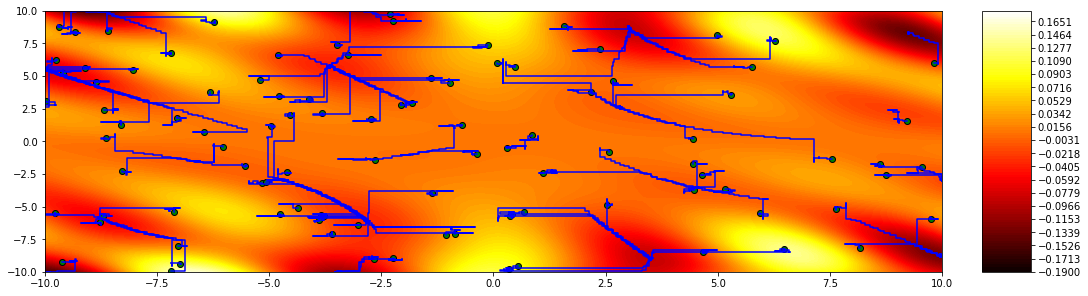

In [18]:
for wlk in walkers:
    ax.plot(wlk.visited[:, 0], wlk.visited[:, 1], c = 'b')
fig